# `ECOD` Trial Notebook

Let's try to get familiar with the `ECOD` model from `pyod` to then implement all the experiments with it. 

In [30]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from utils_reboot.datasets import Dataset
from utils_reboot.utils import * 
from model_reboot.interpretability_module import *
import os
import numpy as np
import time 

`ECOD` is pretty easy to use since it has only 2 input parameters:
- `contamination`: the percentage of outliers in the dataset
- `n_jobs` : the number of parallel jobs to run for the model, but here we will leave it as default to 1

## `ECOD` Experiments

In [31]:
dataset = Dataset('wine', path = '../data/real',feature_names_filepath='../data/')
dataset.drop_duplicates()

`scenario_1`

In [3]:
dataset.initialize_train_test()

In [5]:
dataset.X_train

array([[1.329e+01, 1.970e+00, 2.680e+00, ..., 1.070e+00, 2.840e+00,
        1.270e+03],
       [1.430e+01, 1.920e+00, 2.720e+00, ..., 1.070e+00, 2.650e+00,
        1.280e+03],
       [1.368e+01, 1.830e+00, 2.360e+00, ..., 1.230e+00, 2.870e+00,
        9.900e+02],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
I=ECOD()
I.fit(dataset.X_train)
scores=I.predict(dataset.X_test)

# Correlation Experiments 

Experiment to compute the correlation between `LFI` importance scores and Anomaly Scores

In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from utils_reboot.datasets import Dataset
from utils_reboot.utils import * 
import os
import numpy as np
import time 

2024-09-03 07:40:21.673262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
dataset=Dataset('wine',path='../data/real/')
dataset.drop_duplicates()
dataset.pre_process()

In [8]:
I=ExtendedIsolationForest(1,200)
I.fit(dataset.X_train)

## Compute Anomaly Scores 

In [11]:
scores=I.predict(dataset.X_test)
scores.shape

(129,)

## Compute `LFI` scores

In [13]:
lfi_scores=I.local_importances(dataset.X_test)
lfi_scores.shape

(129, 13)

### Compute the sum of each row in the `LFI` scores

In [15]:
# Compute the sum of each row in lfi_scores
lfi_scores_sum = np.sum(lfi_scores, axis=1)
lfi_scores_sum.shape

(129,)

#### N.B → It makes sense

The intuition we started from seems to make sense → the maximym sum of the `LFI` scores corresponds to the sample with the highest Anomaly Score

In [17]:
# Find the index where lfi_scores_sum is the highest
index = np.argmax(lfi_scores_sum)
# Find the index where scores is the highest
index2 = np.argmax(scores)
print(f'Index of max lfi_scores_sum: {index}')
print(f'Index of max scores: {index2}')

Index of max lfi_scores_sum: 72
Index of max scores: 72


In [18]:
# Find the index where lfi_scores_sum is the lowest
index = np.argmin(lfi_scores_sum)
# Find the index where scores is the lowest
index2 = np.argmin(scores)
print(f'Index of min lfi_scores_sum: {index}')
print(f'Index of min scores: {index2}')

Index of min lfi_scores_sum: 99
Index of min scores: 99


## Compute Correlation

The correlation score is almost 1 so this confirms the intuition we started from → the higher the feature importances the higher the Anomaly Score

In [19]:
# Compute the correlation between scores and lfi_scores_sum
correlation = np.corrcoef(scores, lfi_scores_sum)
print(f'Correlation between scores and lfi_scores_sum: {correlation[0,1]}')

Correlation between scores and lfi_scores_sum: 0.9621052097500566


In [22]:
correlation

array([[1.        , 0.96210521],
       [0.96210521, 1.        ]])

### Check `corr_exp.pickle`

In [28]:
basepath=os.path.dirname(os.getcwd())
cor_path=os.path.join(basepath,'utils_reboot','corr_exp.pickle')
cor_dict=open_element(cor_path)

In [29]:
cor_dict.keys()

dict_keys(['EXIFFI+', 'EXIFFI', 'DIFFI', 'IF_RandomForest', 'EIF_RandomForest', 'EIF+_RandomForest', 'RandomForest'])

In [26]:
cor_dict['EXIFFI+'].keys()

dict_keys(['Xaxis'])

In [27]:
cor_dict['EXIFFI+']['Xaxis']

[0.9284276502821726,
 0.936314335211612,
 0.9158891873347039,
 0.9364476213950881,
 0.9314721781297911,
 0.9289341147883154,
 0.918314225129243,
 0.9168395835342296,
 0.9356587095881654,
 0.9271933197199017]

## Test with `DIFFI` 

In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from utils_reboot.datasets import Dataset
from utils_reboot.utils import * 
from model_reboot.interpretability_module import *
import os
import numpy as np
import time 

2024-09-03 09:00:54.003925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset=Dataset('wine',path='../data/real/')
dataset.drop_duplicates()
dataset.pre_process()

In [3]:
I=sklearn_IsolationForest(n_estimators=200)
I.fit(dataset.X_train)

sklearn_IsolationForest()

Compute Anomaly Scores with `DIFFI` and check the correlation with the `LFI` scores

In [4]:
scores=I.predict(dataset.X_test)

In [5]:
lfi=np.zeros((dataset.X_test.shape[0],dataset.X_test.shape[1]))
for i in range(dataset.X_test.shape[0]):
    lfi[i],_=local_diffi(I,dataset.X_test[i,:])

lfi.shape

(129, 13)

In [6]:
lfi_sum=np.sum(lfi,axis=1)
lfi_sum.shape

(129,)

In [7]:
correlation = np.corrcoef(scores, lfi_sum)
print(f'Correlation between scores and lfi_scores_sum: {correlation[0,1]}')

Correlation between scores and lfi_scores_sum: 0.9406390411642097


### `RandomForest` Importance

The strategy used throughout the paper to compute the importance with `RandomForest` is to create a `RandomForestRegressor()` and fit it to the task of predicting the Anomaly Scores produced by the `AD` model we want to explain. Then we compute the feature importances with the `feature_importances_` attribute of the `RandomForestRegressor` model.

This is however only a `GFI` score. 

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(dataset.X_test, I.predict(dataset.X_test))
fi = rf.feature_importances_

In [11]:
fi

array([0.06552875, 0.02920797, 0.07393253, 0.0663468 , 0.19107696,
       0.1586969 , 0.02763913, 0.04929794, 0.1489197 , 0.04123027,
       0.04694226, 0.0642726 , 0.03690819])

#### N.B. `RandomForest` `LFI` Score

One possible idea to compute the `LFI` scores with the `RandomForest` surrogate model is to fit the model only on a single sample and then compute the feature importances. This way we can get the `LFI` scores for a single sample.

In [28]:
rf = RandomForestRegressor()
rf.fit(dataset.X_test[10,:].reshape(1,-1), [I.predict(dataset.X_test)[10]])
fi = rf.feature_importances_
print(f'Local Feature Importance: {fi}')

Local Feature Importance: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
dataset.X_test[0,:].reshape(1,-1)

array([[ 0.76126556, -0.39331144,  1.22362398, -1.20140666,  0.30838901,
         1.5701678 ,  1.73351092, -0.63975504,  0.33709255,  0.42461294,
         0.61469876,  0.65569271,  2.92914239]])

In [26]:
[I.predict(dataset.X_test)[0]]

[0.4777249886806976]

## `ECOD` Feature Importance



In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from utils_reboot.datasets import Dataset
from utils_reboot.utils import * 
from model_reboot.interpretability_module import *
import os
import numpy as np
import time 

2024-09-05 10:36:27.988169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = Dataset('bisect_3d', path = '../data/syn',feature_names_filepath='../data/')
dataset.drop_duplicates()
dataset.initialize_train_test()

In [3]:
I=ECOD()
I.fit(dataset.X_train)
scores=I.predict(dataset.X_test)

In [5]:
dataset.X_train.shape,dataset.X_test.shape

((1100, 6), (1100, 6))

### Try with other models

`IsolationForest`

In [45]:
from sklearn.ensemble import IsolationForest 
I=IsolationForest()
I.fit(dataset.X_train)

IsolationForest()

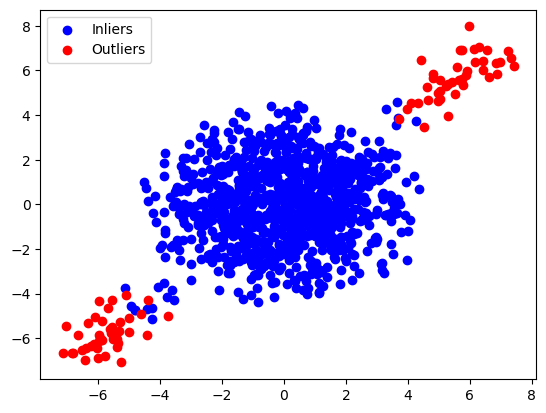

In [46]:
labels=I.predict(dataset.X_test)
inliers=dataset.X_test[labels==1]
outliers=dataset.X_test[labels==-1]
plt.scatter(inliers[:,0],inliers[:,1],c='b',label='Inliers')
plt.scatter(outliers[:,0],outliers[:,1],c='r',label='Outliers')
plt.legend()
plt.show()

`EIF` and `EIF+`

In [47]:
plus=1
I=ExtendedIsolationForest(plus=plus)
I.fit(dataset.X_train)

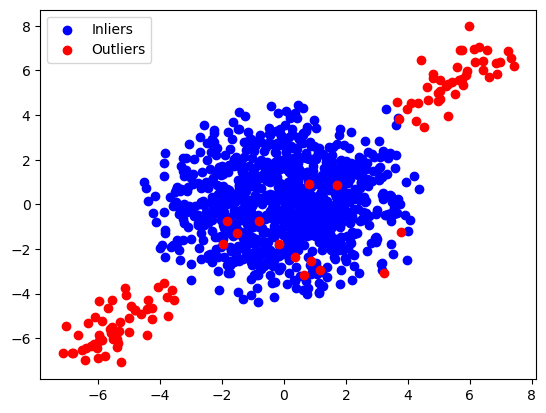

In [48]:
labels=I._predict(dataset.X_test,p=0.1)
inliers=dataset.X_test[labels==0]
outliers=dataset.X_test[labels==1]
plt.scatter(inliers[:,0],inliers[:,1],c='b',label='Inliers')
plt.scatter(outliers[:,0],outliers[:,1],c='r',label='Outliers')
plt.legend()
plt.show()

### Test `LFI` and `GFI` scores

In [10]:
I.O[-dataset.shape[0]:]

array([[1.93416126, 0.81070297, 0.77258401, 0.81891657, 1.38266459,
        3.3654793 ],
       [1.08148704, 2.72639934, 2.62103882, 2.74038558, 1.04464077,
        1.43091143],
       [1.03948612, 2.01263287, 2.71260602, 1.38993735, 1.96611286,
        2.84418238],
       ...,
       [3.56907825, 0.80662133, 0.7396672 , 1.05764485, 0.79246538,
        1.10316811],
       [3.28949339, 0.79447543, 0.94394226, 0.88717333, 0.87401525,
        0.70227966],
       [4.80584088, 1.35761856, 0.83136486, 0.80052994, 0.7189313 ,
        0.81685683]])

In [11]:
I.O[:dataset.shape[0]]

array([[1.93416126, 0.81070297, 0.77258401, 0.81891657, 1.38266459,
        3.3654793 ],
       [1.08148704, 2.72639934, 2.62103882, 2.74038558, 1.04464077,
        1.43091143],
       [1.03948612, 2.01263287, 2.71260602, 1.38993735, 1.96611286,
        2.84418238],
       ...,
       [3.56907825, 0.80662133, 0.7396672 , 1.05764485, 0.79246538,
        1.10316811],
       [3.28949339, 0.79447543, 0.94394226, 0.88717333, 0.87401525,
        0.70227966],
       [4.80584088, 1.35761856, 0.83136486, 0.80052994, 0.7189313 ,
        0.81685683]])

Test Global Importance

In [5]:
lfi=I.local_importances(dataset.X_test)
lfi.shape

(449, 9)

In [6]:
lfi

array([[0.01135848, 0.10234328, 0.1030348 , 0.12458296, 0.17233324,
        0.76551299],
       [0.00955319, 0.47757743, 0.45156779, 0.65276944, 0.13516188,
        0.13907697],
       [0.0094756 , 0.24411578, 0.4947877 , 0.18777536, 0.27887321,
        0.46401691],
       ...,
       [0.01660938, 0.1020905 , 0.10100209, 0.14666788, 0.11444397,
        0.11200033],
       [0.01548282, 0.10134362, 0.11463108, 0.13038544, 0.12061483,
        0.08813   ],
       [0.02341716, 0.14639851, 0.10681423, 0.12308303, 0.10926086,
        0.09413633]])

In [4]:
gfi=I.global_importances(dataset.X_test)
gfi.shape

Shape of lfi_in: (405, 9)
Shape of lfi_out: (44, 9)


(9,)

In [8]:
gfi

array([56.07254027,  0.6181939 ,  0.56082861,  0.53670016,  0.61508789,
        0.70777206])

#### N.B. 

- Attribute `O` → Outlier score for each feature → take onl the first half of the scores 
- Formula for feature importance
 -  For each feature f
    - Distance from a given sample `x[f]` and the 99% percentile of feature `f` 
    - The importance score is the inverse of this distance → in this way the closer a sample is to the 99% percentile the higher the importance score

See a more detailed explanation on the `LFI` and `GFI` explanation on the Obsidian note

In [4]:
I.O.shape

(898, 9)

In [9]:
I.O[2]

array([1.23182556, 1.13720959, 1.23182556, 0.97122445, 0.85474946,
       0.79875519, 0.63055934, 0.79381691, 0.30793023])

In [10]:
I.O[451]

array([1.23182556, 1.13720959, 1.23182556, 0.97122445, 0.85474946,
       0.79875519, 0.63055934, 0.79381691, 0.30793023])

In [29]:
imp_df=pd.DataFrame(I.O)
imp_df.describe()

,0,1,2,3,4,5,6,7,8
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,1.275273,1.167302,1.206074,1.134320,1.222775,1.000107,1.295681,1.069922,0.771913
std,0.559160,0.397239,0.428647,0.450031,0.706675,0.182251,0.635557,0.456634,0.859938
min,0.504904,0.634752,0.686488,0.686488,0.554063,0.668944,0.630559,0.643191,0.307930
25%,0.925239,0.875914,0.914066,0.947968,0.854749,0.959528,0.759915,0.793817,0.307930
50%,1.231826,1.137210,1.231826,0.971224,0.854749,0.959528,1.130289,0.793817,0.307930
75%,1.872916,1.336338,1.319531,1.336338,1.472294,1.239488,1.830357,1.370824,1.327899
max,2.175197,1.932636,2.081671,2.099690,2.848926,1.239488,3.111291,2.012678,3.467966


In [13]:
dataset = Dataset('Xaxis', path = '../data/syn',feature_names_filepath='../data/')
dataset.drop_duplicates()
dataset.initialize_train_test()

In [14]:
np.quantile(dataset.X_test,0.99,axis=0)

array([11.26368319,  3.77229671,  3.72308553,  3.46972396,  3.57417348,
        3.91893532])

In [33]:
I.O - np.quantile(I.O, 0.99, axis=0)

array([[-1.67029319, -0.79542603, -0.84984563, ..., -2.48073128,
        -1.21886142, -3.16003532],
       [-1.67029319, -1.17747086, -1.38182008, ..., -2.48073128,
        -1.36948724, -3.16003532],
       [-0.94337169, -0.79542603, -0.84984563, ..., -2.48073128,
        -1.21886142, -3.16003532],
       ...,
       [-1.67029319,  0.        ,  0.        , ..., -1.08180517,
         0.        , -2.14006616],
       [-1.2443241 , -0.42073258, -0.97859462, ...,  0.        ,
        -0.81831032, -3.16003532],
       [-1.2443241 , -0.42073258, -0.47445798, ...,  0.        ,
        -1.05894703, -3.16003532]])

#### FINAL FORMULA TO IMPLEMENT

In [36]:
imp_weight=1/(1+(np.quantile(I.O, 0.99, axis=0) - I.O))
imp_weight[70]

array([0.37449071, 0.43518309, 0.54058565, 0.41669469, 0.3339816 ,
       0.7812744 , 0.33545773, 0.45068159, 0.24038257])

### `explain_outlier` plot

In [15]:
labels=I._predict(dataset.X_test,p=0.1)
out_idx=np.where(labels==1)[0]
print(f'Indexes of outliers: {out_idx}')

Indexes of outliers: [  20   51   78   83   96  228  377  385  444  482  508  569  592  601
  645  652 1000 1001 1002 1004 1005 1006 1007 1008 1009 1010 1011 1012
 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026
 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040
 1041 1042 1043 1044 1045 1046 1048 1049 1050 1051 1052 1053 1054 1055
 1056 1057 1060 1061 1062 1064 1065 1066 1067 1068 1069 1070 1071 1072
 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1086 1087
 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099]


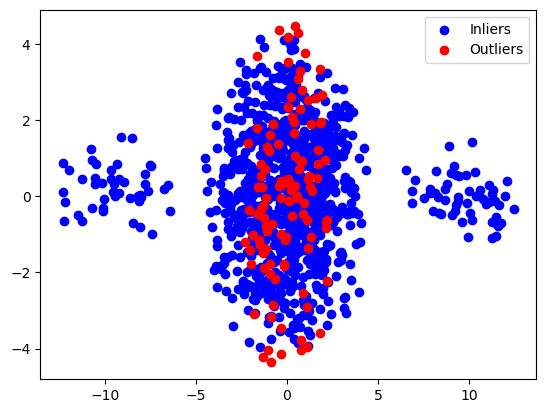

In [25]:
inliers=dataset.X_test[labels==0]
outliers=dataset.X_test[labels==1]
plt.scatter(inliers[:,0],inliers[:,1],c='b',label='Inliers')
plt.scatter(outliers[:,0],outliers[:,1],c='r',label='Outliers')
plt.legend()
plt.show()

In [12]:
labels=I._predict(dataset.X_test,p=0.1)

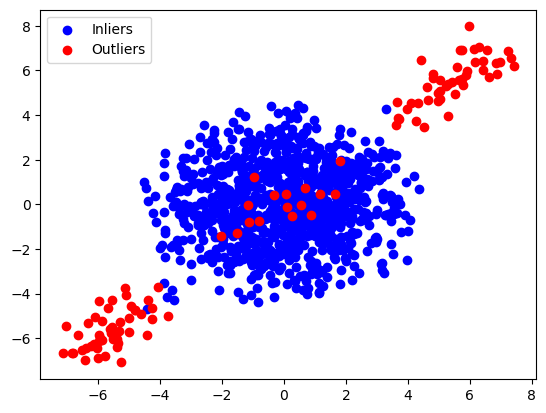

In [13]:
inliers=dataset.X_test[labels==0]
outliers=dataset.X_test[labels==1]
plt.scatter(inliers[:,0],inliers[:,1],c='b',label='Inliers')
plt.scatter(outliers[:,0],outliers[:,1],c='r',label='Outliers')
plt.legend()
plt.show()

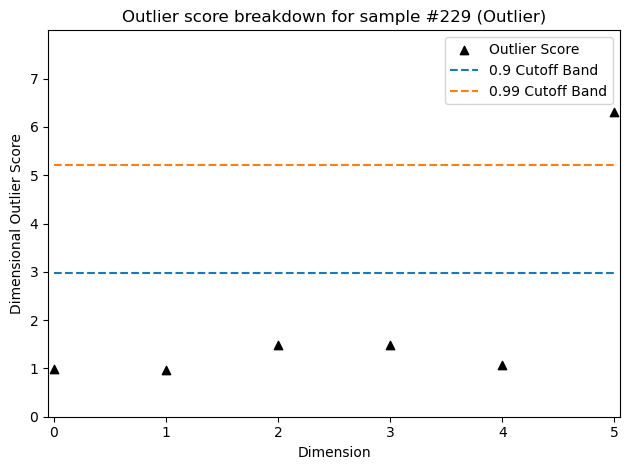

In [19]:
ind=228
cutoffs=[0.9,0.99]
feature_names=dataset.feature_names
out_score_ind,quantile1,quantile2=I.explain_outlier(ind=ind,feature_names=feature_names,cutoffs=cutoffs)

In [16]:
print(f'Outlier score of sample {ind+1}: {out_score_ind}')
print(f'Quantile {cutoffs[0]} for all the features: {quantile1}')
print(f'Quantile {cutoffs[1]} for all the features: {quantile2}')

Outlier score of sample 21: [1.44238383 1.56064775 1.09770361 4.80584088 1.08148704 2.54871816]
Quantile 0.9 for all the features: [2.97951562 2.97951562 2.97951562 2.97951562 2.97951562 2.97951562]
Quantile 0.99 for all the features: [5.21130599 5.21130599 5.21130599 5.21130599 5.21130599 5.21130599]


In [17]:
out_score_ind

array([1.44238383, 1.56064775, 1.09770361, 4.80584088, 1.08148704,
       2.54871816])

In [12]:
I.O[ind]

array([1.87291638, 1.93263562, 2.0816712 , 2.0996897 , 1.15119583,
       1.23948844, 3.11129061, 2.01267833, 2.67303568])

In [18]:
1/(1 + (quantile2 - out_score_ind))

array([0.20969099, 0.21502333, 0.19555686, 0.71150824, 0.19493865,
       0.273031  ])

In [19]:
1/(1 + (quantile2 - out_score_ind)**2)

array([0.06576882, 0.06979679, 0.0557982 , 0.85880996, 0.05538508,
       0.12361896])

### Check scores

In [1]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from utils_reboot.datasets import Dataset
from utils_reboot.utils import * 
from model_reboot.interpretability_module import *
import os
import numpy as np
import time 

2024-09-05 11:24:33.079405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
dataset = Dataset('bisect_3d', path = '../data/syn',feature_names_filepath='../data/')
dataset.drop_duplicates()
# dataset.split_dataset(train_size=1-dataset.perc_outliers,contamination=0)
dataset.initialize_train_test()

In [7]:
dataset.X_train.shape,dataset.X_test.shape

((1100, 6), (1100, 6))

In [8]:
I=ECOD()
I.fit(dataset.X_train)
scores=I.predict(dataset.X_test)

In [9]:
gfi=I.global_importances(dataset.X_test,percentile=0.99)
gfi

array([5.14996241, 5.11826593, 5.18214233, 0.71436938, 0.93112098,
       0.57750789])

Scenario 2

In [9]:
I.O.shape

(2100, 6)

In [10]:
I.feat_outlier_score(dataset.X_test).shape

(1100, 6)

### Check `ECOD` `GFI` Scores

In [9]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
from utils_reboot.datasets import Dataset
from utils_reboot.utils import * 
from model_reboot.interpretability_module import *
import os
import numpy as np
import time 

In [13]:
basepath=os.path.dirname(os.getcwd())
gfi_path=os.path.join(basepath,'experiments','results','Xaxis',
                      'experiments','global_importances',
                      'ECOD','ECOD','scenario_2')
gfi_filepath=get_most_recent_file(gfi_path,filetype='npz')
gfi=open_element(gfi_filepath,filetype='npz')

In [17]:
time_dict_path=os.path.join(basepath,'utils_reboot','time_scaling_test_dei_new.pickle')
time_dict=open_element(time_dict_path)

In [18]:
time_dict['importances'].keys()

dict_keys(['EXIFFI+', 'EXIFFI', 'DIFFI', 'RandomForest', 'ECOD'])

In [23]:
del time_dict['importances']['ECOD']['Xaxis']

In [24]:
save_element(element=time_dict,
             directory_path=os.path.join(basepath,'utils_reboot'),
             filename='time_scaling_test_dei_new_1',
             no_time=True)